This notebook exercises some utility functions to load and explore the data.
It assumes that you have downloaded the training data and placed it in a *data* directory at the top of the repository.

In [1]:
import sys, os

sys.path.append("..")
import planet.util

import plotly
plotly.offline.init_notebook_mode(connected=True)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

First we define the data paths.

In [2]:
data_dir = "../data"
train_tags_path = os.path.join(data_dir, "train_v2.csv")
train_images_path = os.path.join(data_dir, "train-jpg")

Then we load the tags and count their occurrences.

In [3]:
train_tags = planet.util.read_tags(train_tags_path)
train_tags_counts = planet.util.count_tags(train_tags)
train_tags_counts_fig = plotly.graph_objs.Figure({
    "data" : [
        plotly.graph_objs.Bar
        (
            x=list(train_tags_counts.keys()),
            y=list(train_tags_counts.values())
        )
    ],
    "layout" : {"title" : "Counts of Training Tags"}
})
plotly.offline.iplot(
    train_tags_counts_fig,
    filename=os.path.join(data_dir, "train_tags_counts.html")
)

The distribution of tags is very non-uniform. A few tags occur very frequently, like *primary* and *clear*, whereas others occur hardly at all, like *conventional_mine* and *blow_down*.

Next, we plot an example image for each tag.

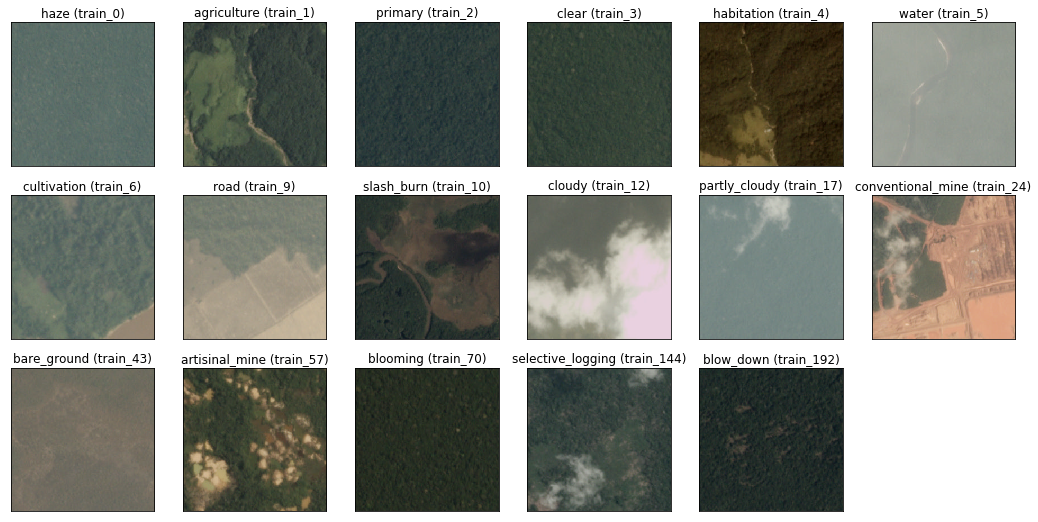

In [4]:
import skimage.io

image_fig = plt.figure(figsize=(18, 9))
example_tags = set()
for sample, tag_list in train_tags.items():
    diff = set(tag_list) - example_tags
    if len(diff) > 0:
        tag = diff.pop()
        example_tags.add(tag)
        image = skimage.io.imread(os.path.join(data_dir, "train-jpg/{}.jpg".format(sample)))
        i = len(example_tags)
        ax = image_fig.add_subplot(3, 6, i)
        ax.set_title("{} ({})".format(tag, sample))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        plt.imshow(image)
        if i >= 18 or i == len(train_tags_counts):
            break
plt.show()

A very preliminary observation is that **color** may play an important role is assigning tags to images. For example, *cloudy* clearly contains many white pixels, *primary* contains many green pixels and *habitation* contains many brown pixels. Other tags are more associated with structure and texture, such as *road* and *selective_logging*.